In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import csv
from numpy import genfromtxt
from mlxtend.data import loadlocal_mnist
import keras
from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D,MaxPooling2D,LeakyReLU
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
dir_path = '/content/drive/My Drive/UDEM_winter_semester/LearningRepresentation/Assigment1/'

In [0]:
X, y = loadlocal_mnist(
        images_path=dir_path+'train-images.idx3-ubyte', 
        labels_path=dir_path+'train-labels.idx1-ubyte')

np.savetxt(fname=dir_path+'train_data.csv', 
           X=X, delimiter=',', fmt='%d')
np.savetxt(fname=dir_path+'train_labels.csv', 
           X=y, delimiter=',', fmt='%d')

In [0]:
train_X = genfromtxt(dir_path+'train_data.csv', delimiter=',')
train_X_reshaped = train_X.reshape(-1,28,28,1)
train_Y = np.genfromtxt(dir_path+'train_labels.csv', delimiter=',')
train_Y_one_hot= keras.utils.to_categorical(train_Y)

In [0]:
train_X_reshaped = train_X_reshaped/255

In [0]:
test_X, test_y = loadlocal_mnist(
        images_path=dir_path+'t10k-images.idx3-ubyte', 
        labels_path=dir_path+'t10k-labels.idx1-ubyte')

np.savetxt(fname=dir_path+'test_data.csv', 
           X=test_X, delimiter=',', fmt='%d')
np.savetxt(fname=dir_path+'test_labels.csv', 
           X=test_y, delimiter=',', fmt='%d')

In [0]:
test_X = genfromtxt(dir_path+'test_data.csv', delimiter=',')
test_X_reshaped = test_X.reshape(-1,28,28,1)
test_Y = np.genfromtxt(dir_path+'test_labels.csv', delimiter=',')
test_Y_one_hot= keras.utils.to_categorical(test_Y)

In [0]:
test_X_reshaped = test_X_reshaped/255

In [10]:
print(train_X_reshaped.shape)
print(train_Y_one_hot.shape)

(60000, 28, 28, 1)
(60000, 10)


In [11]:
print(train_Y_one_hot[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [12]:
print(train_X_reshaped.max())

1.0


In [0]:
from sklearn.model_selection import train_test_split
train_data,valid_data,train_label,valid_label = train_test_split(train_X_reshaped, train_Y_one_hot, test_size=0.2)

In [0]:
batch_size = 64
epochs = 10
num_classes = 10

In [15]:
classifier = Sequential()

classifier.add(Conv2D(32, kernel_size=(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
classifier.add(LeakyReLU(alpha=0.1))
classifier.add(Conv2D(64, (3,3), activation='relu',padding='same'))
classifier.add(LeakyReLU(alpha=0.1))
classifier.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

classifier.add(Conv2D(128, (3,3), activation='relu',padding='same'))
classifier.add(LeakyReLU(alpha=0.1))                  
classifier.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

classifier.add(Flatten())

classifier.add(Dense(64, activation='relu'))
classifier.add(LeakyReLU(alpha=0.1))
classifier.add(Dense(64, activation='relu'))
classifier.add(LeakyReLU(alpha=0.1))      

classifier.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
opt = keras.optimizers.SGD(lr=0.01, decay=0.0, momentum=0.0, nesterov=False)
classifier.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt,metrics=['accuracy'])
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 128)       0         
__________

In [17]:
train = classifier.fit(train_data, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_data, valid_label))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 16s 338us/step - loss: 0.9733 - acc: 0.6758 - val_loss: 0.4010 - val_acc: 0.8705
Epoch 2/10
48000/48000 [==============================] - 14s 302us/step - loss: 0.2126 - acc: 0.9345 - val_loss: 0.1600 - val_acc: 0.9507
Epoch 3/10
48000/48000 [==============================] - 15s 304us/step - loss: 0.1300 - acc: 0.9608 - val_loss: 0.1137 - val_acc: 0.9659
Epoch 4/10
48000/48000 [==============================] - 15s 304us/step - loss: 0.0944 - acc: 0.9712 - val_loss: 0.0925 - val_acc: 0.9728
Epoch 5/10
48000/48000 [==============================] - 15s 302us/step - loss: 0.0767 - acc: 0.9766 - val_loss: 0.0918 - val_acc: 0.9726
Epoch 6/10
48000/48000 [==============================] - 14s 302us/step - loss: 0.0652 - acc: 0.9801 - val_loss: 0.0971 - val_acc: 0.9709
Epoch 7/10
48000/48000 [==============================] - 15s 302us/

In [18]:
score = classifier.evaluate(test_X_reshaped, test_Y_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04024069137638435
Test accuracy: 0.9869


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


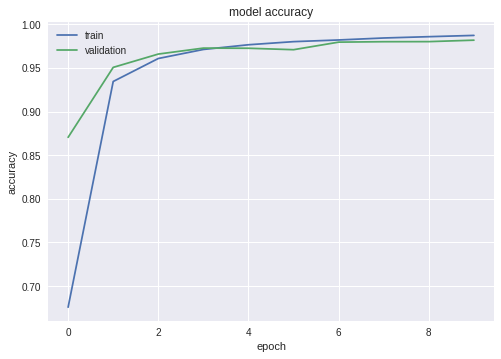

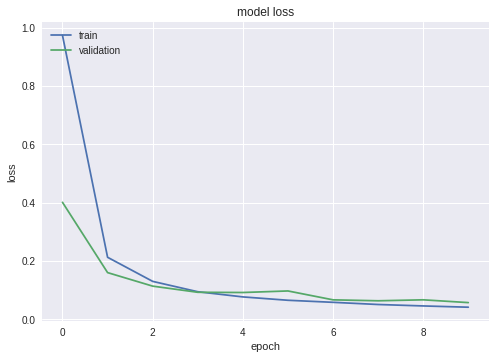

In [21]:
print(train.history.keys())
#  "Accuracy"
fig_accuracy = plt.figure()
plt.plot(train.history['acc'])
plt.plot(train.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
fig_accuracy.savefig(dir_path+'accuracy_mnist_CNN.png')
# "Loss"
fig_loss = plt.figure()
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
fig_loss.savefig(dir_path+'loss_mnist_CNN.png')